## 1. Data Preparation & Data Visualization

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# J-V 커브는 X축 Voc, Y축 Jsc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
df_Perovskite = pd.read_csv('Perovskite_database_filtered.csv')
df_Pristine = pd.read_csv('Pristine.csv')
df_TiO2 = pd.read_csv('TiO2.csv')
df_Ag_NPs = pd.read_csv('Ag_NPs.csv')

df_pero_pier = df_Perovskite[['JV_reverse_scan_Voc', 'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF', 'JV_reverse_scan_PCE']]

In [7]:
print(df_Perovskite.columns.values)

['Ref_ID' 'Ref_ID_temp' 'Ref_name_of_person_entering_the_data'
 'Ref_data_entered_by_author' 'Ref_DOI_number' 'Ref_lead_author'
 'Ref_publication_date' 'Ref_journal' 'Ref_part_of_initial_dataset'
 'Ref_original_filename_data_upload' 'Ref_free_text_comment'
 'Ref_internal_sample_id' 'Cell_stack_sequence' 'Cell_area_total'
 'Cell_area_measured' 'Cell_number_of_cells_per_substrate'
 'Cell_architecture' 'Cell_flexible' 'Cell_flexible_min_bending_radius'
 'Cell_semitransparent' 'Cell_semitransparent_AVT'
 'Cell_semitransparent_wavelength_range' 'Cell_semitransparent_raw_data'
 'Module' 'Module_number_of_cells_in_module' 'Module_area_total'
 'Module_area_effective' 'Module_JV_data_recalculated_per_cell'
 'Substrate_stack_sequence' 'Substrate_thickness' 'Substrate_area'
 'Substrate_supplier' 'Substrate_brand_name'
 'Substrate_deposition_procedure' 'Substrate_surface_roughness_rms'
 'Substrate_etching_procedure' 'Substrate_cleaning_procedure'
 'ETL_stack_sequence' 'ETL_thickness' 'ETL_additive

In [8]:
df_Pristine

,Perovskite solar cells,Jsc(mA/cm2),Voc(V),ff,Efficiency(%)
0,Sample # 1,19.684,0.878,0.690,11.925
1,Sample # 2,20.591,0.869,0.669,11.971
2,Sample # 3,19.654,0.899,0.678,11.980
3,Sample # 4,20.643,0.867,0.688,12.313
4,Sample # 5,21.650,0.869,0.655,12.323
5,Sample # 6,20.513,0.899,0.678,12.503
6,Sample # 7,21.959,0.873,0.658,12.614
7,Sample # 8,20.399,0.888,0.699,12.662
8,Sample # 9,21.562,0.882,0.666,12.666
9,Sample # 10,22.516,0.894,0.633,12.742


Text(0, 0.5, 'Jsc')

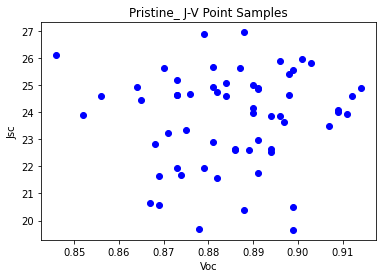

In [9]:
Voc_Pristine = df_Pristine[["Voc(V)"]].values
Jsc_Pristine = df_Pristine[["Jsc(mA/cm2)"]].values

fig_Pristine_JV = plt.figure()
ax = fig_Pristine_JV.add_subplot(1, 1, 1)

plt.scatter(Voc_Pristine, Jsc_Pristine, color = 'blue', marker = 'o')
plt.title("Pristine_ J-V Point Samples")
plt.xlabel("Voc")
plt.ylabel("Jsc")

Text(0, 0.5, 'PCE')

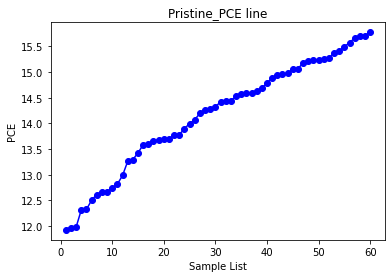

In [10]:
Efficiency_Pristine = df_Pristine[["Efficiency(%)"]].values
sample_list = list(range(1,61,1))

fig_Pristine_PCE = plt.figure()
ax = fig_Pristine_PCE.add_subplot(1, 1, 1)

plt.plot(sample_list, Efficiency_Pristine, color = 'blue', marker = 'o')
plt.title("Pristine_PCE line")
plt.xlabel("Sample List")
plt.ylabel("PCE")

In [11]:
df_TiO2

,Perovskite solar cells based on TiO2 composite film,Jsc(mA/cm2),Voc(V),ff,Efficiency(%)
0,Sample # 1,20.991,0.867,0.677,12.321
1,Sample # 2,20.306,0.894,0.694,12.599
2,Sample # 3,21.487,0.899,0.672,12.981
3,Sample # 4,21.608,0.884,0.696,13.295
4,Sample # 5,21.564,0.903,0.696,13.553
5,Sample # 6,21.942,0.884,0.708,13.733
6,Sample # 7,22.095,0.893,0.698,13.772
7,Sample # 8,22.618,0.885,0.695,13.912
8,Sample # 9,22.785,0.881,0.694,13.931
9,Sample # 10,22.592,0.874,0.708,13.980


Text(0, 0.5, 'Jsc')

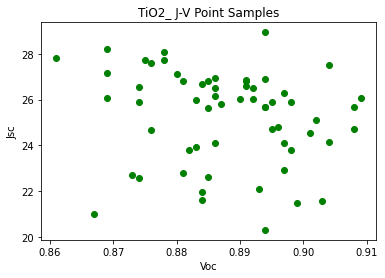

In [12]:
Voc_TiO2 = df_TiO2[["Voc(V)"]].values
Jsc_TiO2 = df_TiO2[["Jsc(mA/cm2)"]].values

fig_TiO2 = plt.figure()
ax = fig_TiO2.add_subplot(1, 1, 1)

plt.scatter(Voc_TiO2, Jsc_TiO2, color = 'green', marker = 'o')
plt.title("TiO2_ J-V Point Samples")
plt.xlabel("Voc")
plt.ylabel("Jsc")

Text(0, 0.5, 'PCE')

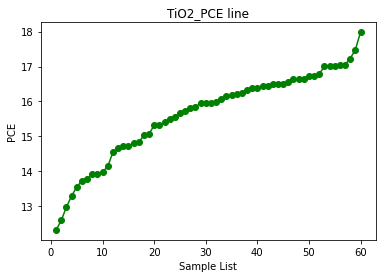

In [13]:
Efficiency_TiO2 = df_TiO2[["Efficiency(%)"]].values
sample_list = list(range(1,61,1))

fig_TiO2_PCE = plt.figure()
ax = fig_TiO2_PCE.add_subplot(1, 1, 1)

plt.plot(sample_list, Efficiency_TiO2, color = 'green', marker = 'o')
plt.title("TiO2_PCE line")
plt.xlabel("Sample List")
plt.ylabel("PCE")

In [14]:
df_Ag_NPs

,Perovskite solar cells based on TiO2 composite film with Ag NPs,Jsc(mA/cm2),Voc(V),ff,Efficiency(%)
0,Sample # 1,25.146,0.907,0.715,16.307
1,Sample # 2,24.974,0.917,0.717,16.420
2,Sample # 3,24.608,0.916,0.731,16.477
3,Sample # 4,24.569,0.918,0.733,16.532
4,Sample # 5,24.651,0.926,0.725,16.549
5,Sample # 6,24.098,0.939,0.748,16.926
6,Sample # 7,24.165,0.948,0.744,17.044
7,Sample # 8,25.608,0.921,0.724,17.076
8,Sample # 9,26.505,0.918,0.703,17.105
9,Sample # 10,24.912,0.935,0.736,17.143


Text(0, 0.5, 'Jsc')

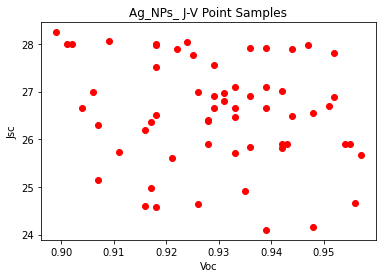

In [15]:
Voc_Ag_NPs = df_Ag_NPs[["Voc(V)"]].values
Jsc_Ag_NPs = df_Ag_NPs[["Jsc(mA/cm2)"]].values

fig_Ag_NPs= plt.figure()
ax = fig_Ag_NPs.add_subplot(1, 1, 1)

plt.scatter(Voc_Ag_NPs, Jsc_Ag_NPs, color = 'red', marker = 'o')
plt.title("Ag_NPs_ J-V Point Samples")
plt.xlabel("Voc")
plt.ylabel("Jsc")

Text(0, 0.5, 'PCE')

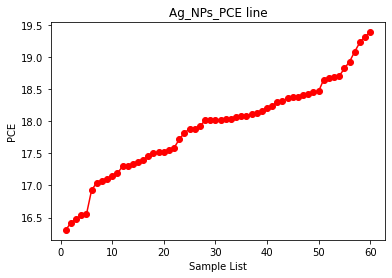

In [16]:
Efficiency_Ag_NPs = df_Ag_NPs[["Efficiency(%)"]].values
sample_list = list(range(1,61,1))

fig_Ag_NPs_PCE = plt.figure()
ax = fig_Ag_NPs_PCE.add_subplot(1, 1, 1)

plt.plot(sample_list, Efficiency_Ag_NPs, color = 'red', marker = 'o')
plt.title("Ag_NPs_PCE line")
plt.xlabel("Sample List")
plt.ylabel("PCE")

## 2. Pearson Correlation Coefficient (PCC)

In [17]:
corr_Preo = df_pero_pier.corr(method = 'pearson')

In [18]:
corr_Preo

,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_reverse_scan_PCE
JV_reverse_scan_Voc,1.000000,0.769994,0.824375,0.536038
JV_reverse_scan_Jsc,0.769994,1.000000,0.708940,0.667373
JV_reverse_scan_FF,0.824375,0.708940,1.000000,0.648930
JV_reverse_scan_PCE,0.536038,0.667373,0.648930,1.000000


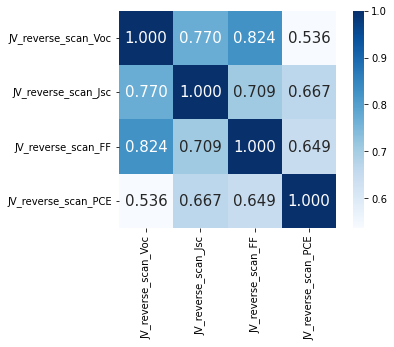

In [19]:
df_heatmap_Pero = sns.heatmap(corr_Preo, cbar = True, annot = True, annot_kws={'size' : 15}, 
                         fmt = '.3f', square = True, cmap = 'Blues')

In [20]:
# df_Pristine
# df_TiO2
# df_Ag_NPs

corr_Pristine = df_Pristine.corr(method = 'pearson')
corr_Pristine

,Jsc(mA/cm2),Voc(V),ff,Efficiency(%)
Jsc(mA/cm2),1.000000,0.058703,-0.160188,0.938130
Voc(V),0.058703,1.000000,-0.243999,0.177061
ff,-0.160188,-0.243999,1.000000,0.091959
Efficiency(%),0.938130,0.177061,0.091959,1.000000


In [21]:
corr_TiO2 = df_TiO2.corr(method = 'pearson')
corr_TiO2

,Jsc(mA/cm2),Voc(V),ff,Efficiency(%)
Jsc(mA/cm2),1.000000,-0.160006,0.071381,0.970435
Voc(V),-0.160006,1.000000,-0.058797,-0.014517
ff,0.071381,-0.058797,1.000000,0.255413
Efficiency(%),0.970435,-0.014517,0.255413,1.000000


In [22]:
corr_Ag_NPs = df_Ag_NPs.corr(method = 'pearson')
corr_Ag_NPs

,Jsc(mA/cm2),Voc(V),ff,Efficiency(%)
Jsc(mA/cm2),1.000000,-0.196768,-0.381967,0.797796
Voc(V),-0.196768,1.000000,0.326699,0.329361
ff,-0.381967,0.326699,1.000000,0.125838
Efficiency(%),0.797796,0.329361,0.125838,1.000000


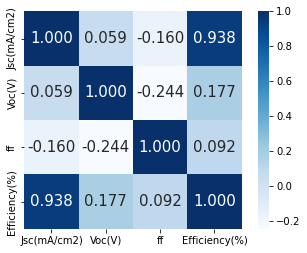

In [23]:
df_heatmap_Pristine = sns.heatmap(corr_Pristine, cbar = True, annot = True, annot_kws={'size' : 15}, 
                         fmt = '.3f', square = True, cmap = 'Blues')

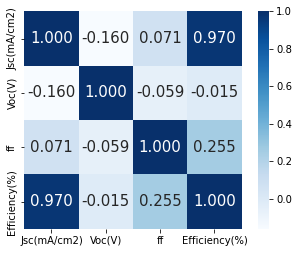

In [24]:
df_heatmap_corr_TiO2 = sns.heatmap(corr_TiO2, cbar = True, annot = True, annot_kws={'size' : 15}, 
                         fmt = '.3f', square = True, cmap = 'Blues')

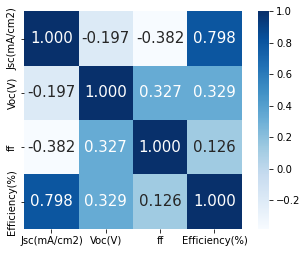

In [25]:
df_heatmap_df_Ag_NPs = sns.heatmap(corr_Ag_NPs, cbar = True, annot = True, annot_kws={'size' : 15}, 
                         fmt = '.3f', square = True, cmap = 'Blues')

In [26]:
# TiO2가 추가된 경우 Jsc에 영향을 주어서 PCE가 높아지는데
# 피어슨 상관계수로 보았을 때, Pristine에서 PCE와 Jsc사이의 관계성이 0.938에서 0.970으로 증가하는 결과를 보였다.

# Ag가 추가된 경우, Voc에 영향을 주어서 PCE가 높아지는데
# 피어슨 상관계수로 보았을 때, 
# Pristine에서 PCE와 Voc는 0.177로 약한 양의 상관관계에서 Ag_NPs가 추가된 경우 0.329로 증가하는 결과를 보였다.

# 추가로 TiO2상관관계에서 PCE와 Voc는 -0.015로 약한 음의 상관관계에서,
# Ag_NPs에서 PCE와 Voc가 0.329로 급격한 증가 및 상관관계의 방향이 바뀌었음이 확인되었다.

c-tio2
mp-tio2
perovskite
htm
au
(역방향)

4810개 데이터.

reference == pristine
효율에 영향을 끼치는것이 Jsc, Voc, FF 인데, 그 중 critical한 부분이 다 다르며, 뭐가 중요한지 모른다. (각 논문마다 다 다름)
레퍼런스를 맞춰야 함. 우리것은 Pristine임(60개 샘플)

1. 4810개 데이터를 트레이닝 데이터로 넣고
validation data로 우리의 60개 Pristine을 넣어서 
Jsc나  Voc를 넣으면 효율이 예측되게 하고 ->PCE accuracy 확인

2. 학습된 모듈에 TiO2 데이터를 validation으로 넣으면 pristine으로 예측된 값이 나올텐데
실제 값과 차이가 있음 (특히 Jsc가 증가한 것일것임) 그럼 실제값과의 차이를 통해  Jsc에 따른 PCE 증가량 차이 찾기
그 후, 수작업이든 뭐든 해서, wt% 관계 찾기 

3. 학습된 모듈에 Ag NPs 데이터를 validation을 넣으면 Jsc에는 큰 변화가 없고 Voc에 영향을 주더라!
실제 값과 차이가 있음. Voc증가량에 따른 PCE증가량 차이를 찾자.

순서 ->
1. 4810개 데이터로 모델 학습시키기
2. TiO2와 NPs




## 3. Machine Learning Part _ Preperation

In [27]:
x_Pero_ref = df_Perovskite[['JV_reverse_scan_Voc', 'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF']]
y_Pero_ref = df_Perovskite['JV_reverse_scan_PCE']

x_Pristine = df_Pristine[['Voc(V)', 'Jsc(mA/cm2)', 'ff']]
y_Pristine = df_Pristine['Efficiency(%)']
x_TiO2 = df_TiO2[['Voc(V)', 'Jsc(mA/cm2)', 'ff']]
y_TiO2 = df_TiO2['Efficiency(%)']
x_Ag_NPs = df_Ag_NPs[['Voc(V)', 'Jsc(mA/cm2)', 'ff']]
y_Ag_NPs = df_Ag_NPs['Efficiency(%)']

# Ref 데이터셋을 통해 RF Accuracy Check용 Splitting
x_train_t, x_validation_t, y_train_t, y_validation_t = train_test_split(x_Pero_ref, y_Pero_ref, test_size = 0.2) # 8:2로 split하여 Test.

# Ref Check 후 사용할 데이터셋
x_train = x_Pero_ref
y_train = y_Pero_ref

# Validation용 데이터셋 제작
x_P_validation = x_Pristine
y_P_validation = y_Pristine

x_TiO2_validation = x_TiO2
y_TiO2_validation = y_TiO2

x_Ag_NPs_validation = x_Ag_NPs
y_Ag_NPs_validation = y_Ag_NPs

In [83]:
# TiO2는 Jsc에 영향을 끼치므로 PCE, Voc, FF 순으로 -> x , Jsc -> y
# Ag_NPs는 Voc에 영향을 끼치므로 PCE, Jsc, FF 순으로 -> x , Voc -> y

# TiO2용 fitting 데이터셋
x_T_Fit = df_Perovskite[['JV_reverse_scan_PCE', 'JV_reverse_scan_Voc', 'JV_reverse_scan_FF']]
y_T_Fit = df_Perovskite['JV_reverse_scan_Jsc']

x_TiO2_Fit = df_TiO2[['Efficiency(%)', 'Voc(V)', 'ff']]
y_TiO2_Fit = df_TiO2['Jsc(mA/cm2)']

# Ag_NPs용 fitting 데이터셋
x_Ag_Fit = df_Perovskite[['JV_reverse_scan_PCE', 'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF']]
y_Ag_Fit = df_Perovskite['JV_reverse_scan_Voc']

x_Ag_NPs_Fit = df_Ag_NPs[['Efficiency(%)', 'Jsc(mA/cm2)', 'ff']]
y_Ag_NPs_Fit = df_Ag_NPs['Voc(V)']

## 4. Model Accuracy Check

In [29]:
model_RF = RandomForestRegressor()
model_RF.fit(x_train_t, y_train_t)

y_pred_t = model_RF.predict(x_validation_t)

result_t_RF = pd.DataFrame({'pred' : y_pred_t, 'real' : y_validation_t})

In [30]:
result_t_RF

,pred,real
106,11.9034,11.99
172,12.6980,12.66
26,19.3699,19.30
1582,2.8238,2.41
50,14.0245,15.09
...,...,...
3012,14.6392,14.66
589,14.6149,14.63
3890,9.1261,9.43
595,13.8677,14.08


In [72]:
model_RF.score(x_validation_t, y_validation_t)

0.8257893823538753

In [32]:
model_XGB = xgboost.XGBRegressor()
model_XGB.fit(x_train_t, y_train_t)

y_pred_t = model_XGB.predict(x_validation_t)

result_t_XGB = pd.DataFrame({'pred' : y_pred_t, 'real' : y_validation_t})

In [33]:
result_t_XGB

,pred,real
106,12.172485,11.99
172,12.633434,12.66
26,19.249159,19.30
1582,2.819774,2.41
50,13.944817,15.09
...,...,...
3012,14.076051,14.66
589,15.047299,14.63
3890,9.014583,9.43
595,13.631134,14.08


In [34]:
model_XGB.score(x_validation_t, y_validation_t)

0.8249857267710873

## 5. Pristine

1. Pristine으로 모델 학습하고, 60개 Pristine 데이터로 점검.
2. TiO2-NTs 로 인풋 넣을때 NTs는 Jsc에 영향을 주므로, X에 PCE, Voc, FF 넣고 Y에 Jsc를 넣는다.
결과값에는 pristine으로 예측된 Jsc가 나올텐데, 이는 실제 Exp Dataset에 비해 적은 수치일 것이다.
3. Ag-NPs 로 인풋 넣을때는 NPs는 Voc에 영향을 주므로, X에 PCE, Jsc, FF 넣고 Y에 Voc를 넣는다.
결과값에는 pristine으로 예측된 Voc가 나올텐데, 이는 실제 Exp Dataset에 비해 적은 수치일 것이다.
4. 이를 통해, NT와 NP를 통해 Jsc, Voc값의 차이계수와 상관관계에 대해서 찾을 수 있다.
5. 그 상관관계는 피어슨 상관계수 값을 통해 보충한다.
6. 혹여나 실제 모델을 통해 NTs, NPs가 추가된 데이터셋으로 실제값과 비슷한 Jsc, Voc를 찾으려면 피어슨 상관계수로 각 feature에 Weight를
부여하면 될 것 같다.

In [36]:
model_P_RF = RandomForestRegressor()
model_P_RF.fit(x_train, y_train)

y_P_pred = model_P_RF.predict(x_P_validation)

result_P_RF = pd.DataFrame({'pred' : y_P_pred, 'real' : y_P_validation})

In [59]:
#result_P_RF

In [38]:
model_P_RF.score(x_P_validation, y_P_validation)

0.5644554336478212

In [39]:
model_P_XGB = xgboost.XGBRegressor()
model_P_XGB.fit(x_train, y_train)

y_P_pred = model_P_XGB.predict(x_P_validation)

result_P_XGB = pd.DataFrame({'pred' : y_P_pred, 'real' : y_P_validation})

In [58]:
#result_P_XGB

In [41]:
model_P_XGB.score(x_P_validation, y_P_validation)

0.7269043571410337

## 6. TiO2_NTs

In [42]:
model_TiO2_RF = RandomForestRegressor()
model_TiO2_RF.fit(x_train, y_train)

y_TiO2_pred = model_TiO2_RF.predict(x_TiO2_validation)

result_TiO2_RF = pd.DataFrame({'pred' : y_TiO2_pred, 'real' : y_TiO2_validation})

In [57]:
#result_TiO2_RF

In [44]:
model_TiO2_RF.score(x_TiO2_validation, y_TiO2_validation)

-0.7735331189316605

In [45]:
model_TiO2_XGB = xgboost.XGBRegressor()
model_TiO2_XGB.fit(x_train, y_train)

y_TiO2_pred = model_TiO2_XGB.predict(x_TiO2_validation)

result_TiO2_XGB = pd.DataFrame({'pred' : y_TiO2_pred, 'real' : y_TiO2_validation})

In [56]:
#result_TiO2_XGB

In [67]:
model_TiO2_XGB.score(x_TiO2_validation, y_TiO2_validation)

0.11695185325686286

## 7. Ag_NPs

In [48]:
model_Ag_NPs_RF = RandomForestRegressor()
model_Ag_NPs_RF.fit(x_train, y_train)

y_Ag_NPs_pred = model_Ag_NPs_RF.predict(x_Ag_NPs_validation)

result_Ag_NPs_RF = pd.DataFrame({'pred' : y_Ag_NPs_pred, 'real' : y_Ag_NPs_validation})

In [54]:
#result_Ag_NPs_RF

In [50]:
model_Ag_NPs_RF.score(x_Ag_NPs_validation, y_Ag_NPs_validation)

-10.321337624300297

In [51]:
model_Ag_NPs_XGB = xgboost.XGBRegressor()
model_Ag_NPs_XGB.fit(x_train, y_train)

y_Ag_NPs_pred = model_Ag_NPs_XGB.predict(x_Ag_NPs_validation)

result_Ag_NPs_XGB = pd.DataFrame({'pred' : y_Ag_NPs_pred, 'real' : y_Ag_NPs_validation})

In [55]:
#result_Ag_NPs_XGB

In [53]:
model_Ag_NPs_XGB.score(x_Ag_NPs_validation, y_Ag_NPs_validation)

-5.77800511529487

## 8. Jsc_Predict TiO2

In [60]:
model_T_Jsc_RF = RandomForestRegressor()
model_T_Jsc_RF.fit(x_T_Fit, y_T_Fit)

y_T_Jsc_pred = model_T_Jsc_RF.predict(x_TiO2_Fit)

result_T_Jsc_RF = pd.DataFrame({'pred' : y_T_Jsc_pred, 'real' : y_TiO2_Fit})

In [94]:
result_T_Jsc_RF

,pred,real
0,20.62847,20.991
1,19.65170,20.306
2,21.35380,21.487
3,20.58740,21.608
4,21.40140,21.564
5,18.13041,21.942
6,19.92943,22.095
7,18.27470,22.618
8,18.78440,22.785
9,17.01129,22.592


In [68]:
model_TiO2_XGB.score(x_TiO2_Fit, y_TiO2_Fit)

-118.73066335793706

In [75]:
model_T_Jsc_XGB = xgboost.XGBRegressor()
model_T_Jsc_XGB.fit(x_T_Fit, y_T_Fit)

y_T_Jsc_pred = model_T_Jsc_XGB.predict(x_TiO2_Fit)

result_T_Jsc_XGB = pd.DataFrame({'pred' : y_T_Jsc_pred, 'real' : y_TiO2_Fit})

In [95]:
result_T_Jsc_XGB

,pred,real
0,20.989166,20.991
1,19.630144,20.306
2,21.278631,21.487
3,21.576323,21.608
4,21.941410,21.564
5,19.639526,21.942
6,20.750742,22.095
7,17.986368,22.618
8,20.370304,22.785
9,19.749825,22.592


In [78]:
model_T_Jsc_XGB.score(x_TiO2_Fit, y_TiO2_Fit)

-6.209152746735548

## 9. Voc_Predict Ag_NPs

In [84]:
model_Ag_Voc_RF = RandomForestRegressor()
model_Ag_Voc_RF.fit(x_Ag_Fit, y_Ag_Fit)

y_Ag_Voc_pred = model_Ag_Voc_RF.predict(x_Ag_NPs_Fit)

result_Ag_Voc_RF = pd.DataFrame({'pred' : y_Ag_Voc_pred, 'real' : y_Ag_NPs_Fit})

In [96]:
result_Ag_Voc_RF

,pred,real
0,0.99995,0.907
1,0.99506,0.917
2,0.98277,0.916
3,0.98317,0.918
4,0.98651,0.926
5,0.97951,0.939
6,0.98842,0.948
7,1.01049,0.921
8,1.02309,0.918
9,1.00427,0.935


In [88]:
model_Ag_Voc_RF.score(x_Ag_NPs_Fit, y_Ag_NPs_Fit)

-58.67587030089483

In [99]:
model_Ag_Voc_XGB = xgboost.XGBRegressor()
model_Ag_Voc_XGB.fit(x_Ag_Fit, y_Ag_Fit)

y_Ag_Voc_pred = model_Ag_Voc_XGB.predict(x_Ag_NPs_Fit)

result_Ag_Voc_XGB = pd.DataFrame({'pred' : y_Ag_Voc_pred, 'real' : y_Ag_NPs_Fit})

In [100]:
result_Ag_Voc_XGB

,pred,real
0,0.978279,0.907
1,0.969119,0.917
2,0.966530,0.916
3,0.970570,0.918
4,0.980637,0.926
5,0.970061,0.939
6,0.984281,0.948
7,0.987589,0.921
8,0.991743,0.918
9,0.991853,0.935


In [101]:
model_Ag_Voc_XGB.score(x_Ag_NPs_Fit, y_Ag_NPs_Fit)

-43.71363201552571

# 모델링 후 테스트 결과

1. 사용 모델은 RandomForest와 XGBoost 이다.

2. 우선 모델의 적합성을 테스트 하기위해 Reference로 사용할 4810개 데이터를 8:2로 분할하여 점검한 결과 RF는 82.5% 82.4%의 score를 보여 비등한 정도의 정확도를 보였다.

3. 기존 실제 실험을 통해 얻은 결과는 Pristine 결과에 비해 TiO2_NTs가 추가되면 Jsc가 높아지고, Ag_NPs가 추가되면 Voc가 높아진다는 것이다.

4. 이를 검증하기 위해 Pristine으로 학습된 두 가지 모델에 실제 실험 데이터를 Input Data로 넣으면 어떤 결과값이 나오는지와, 그 상관관계를 직접 확인하였다.

5. 예상되는 결과1은 TiO2_NTs의 모델 예측 Jsc가 실제 실험데이터 Jsc보다 낮은 것이었으며, 이는 Pristine으로 학습 된 모델이기에 TiO2_NTs가 Jsc의 증가에 기인한다는 것을 모르는 상태에서 예측한 결과이기 때문이다

6. 실제 모델 예측 결과는 예상대로 실측 Jsc보다 낮은 경향을 보였다.

7. 예상되는 결과2는 Ag_NPs의 모델 예측 Voc가 실제 실험 데이터 Voc보다 낮은 것이었으며, 이 또한 Pristine으로 학습 된 모델이기에 Ag_NPs가 Voc의 증가에 기인한다는 것을 모르는 상태에서 예측한 결과이기 때문이다

8. 실제 모델 예측결과는 예상과는 달리 모델의 Voc예측 값이 실제 실험 데이터 Voc보다 높았다.

9. 이는 Reference 4810개의 데이터 셋중 0인 값을 제외한 4527개 평균 Voc가 0.9945이기 때문에 애초에 높은 Voc를 예측했을 것이라고 판단된다.

10. 이에 비해 Ag_NPs 실제 실험 데이터의 평균 Voc값은 0.9297이므로 해당 모델로 예측하여 상관관계를 얻어내기에는 평균치가 낮아 원하는 결과가 얻어지지 못했다고 판단된다.